In [1]:
""" This module implements the base function to implement a VQE for a Ising Chain with Transverse Field. """
from pennylane import numpy as np

import sys
sys.path.insert(0, '../')
import vqe as vqe
import annni_model as annni
import qcnn as qcnn
import visualization as qplt
import losses
import general as qmlgen
import encoder as enc

from matplotlib import pyplot as plt

In [2]:
# Load all possible VQEs to compute the transition phase line
Ns = [6]
side = 100


In [3]:
path = './vqes/ANNNI/'
pathplots = './plots/'

train_index_line  = np.arange(0,2*side-1)
train_index_edges = np.array([0,side-1,2*side-1])

In [4]:
vqes =  []
qcnns = []
encs  = []
for N in Ns:
    try:
        filename = 'N'+str(N)+'n'+str(side)
        vqes.append(vqe.load_vqe(path + filename) )
        print('{0} loaded sucessfully'.format(path+filename))
    except:
        print('{0} not found'.format(path+filename))

./vqes/ANNNI/N6n100 loaded sucessfully


In [5]:
qcnns = []
encs  = []
for vqeclass in vqes:
    qcnns.append(qcnn.qcnn(vqeclass, qcnn.qcnn_circuit, n_outputs = 2))
    encs.append(enc.encoder(vqeclass, enc.encoder_circuit))

AttributeError: module 'pennylane' has no attribute 'RXs'

In [ ]:
lr = .5
epoch = 1000

lines = np.concatenate((np.arange(side), np.arange(1,side)*side))
points = np.array([0,side-1,side*side - side])

In [7]:
qcnns[-1].train(lr, epoch, train_index_edges, losses.cross_entropy, circuit = True)
qplt.show_QCNN_classificationANNNI(qcnns[0], hard_thr = False, train_index = points, label = 'a', info=True)
plt.savefig('N'+str(qcnns[0].N)+'classification.svg')

+--- CIRCUIT ---+
0: ──||──||──||──RY(0.00)─────||──RY(3.00)─╭C──RY(7.00)───||─╭C─────────────────────────
1: ──||──||──||──RY(0.00)─╭C──||──RY(4.00)─╰X──RY(8.00)───||─╰ControlledOperation(13.00)
2: ──||──||──||──RY(1.00)─╰X──||──RY(4.00)─╭C──RY(9.00)───||─╭C─────────────────────────
3: ──||──||──||──RY(1.00)─╭C──||──RY(5.00)─╰X──RY(10.00)──||─╰ControlledOperation(15.00)
4: ──||──||──||──RY(2.00)─╰X──||──RY(5.00)─╭C──RY(11.00)──||─╭C─────────────────────────
5: ──||──||──||──RY(2.00)─────||──RY(6.00)─╰X──RY(12.00)──||─╰ControlledOperation(17.00)

──╭C──────────────────────────────────────||──||────────────────||─────────────────────────────────
──╰ControlledOperation(14.00)─────────────||──||──RY(20.00)─────||──RY(22.00)─╭C──────────RY(24.00)
──╭C──────────────────────────────────────||──||────────────────||────────────│────────────────────
──╰ControlledOperation(16.00)─────────────||──||──RY(20.00)─╭C──||──RY(23.00)─╰X──────────RY(25.00)
──╭C──────────────────────────────────────||──|

  0%|          | 0/1000 [00:00<?, ?it/s]

KeyboardInterrupt: 

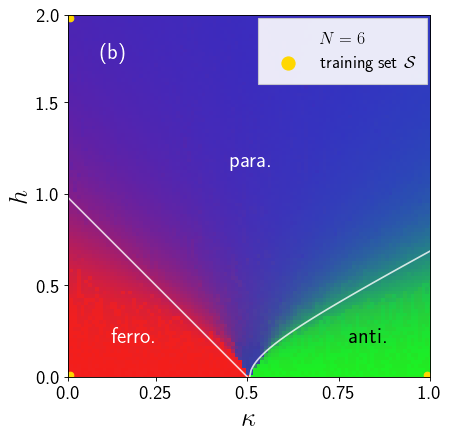

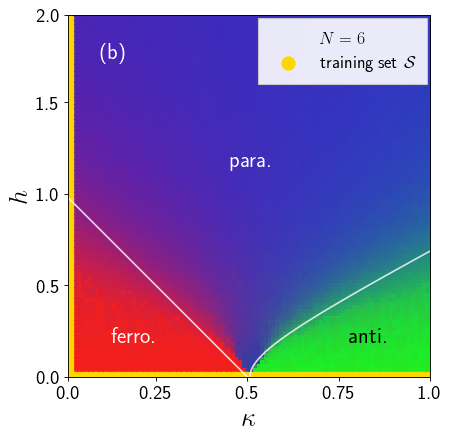

In [81]:
show_QCNN_classificationANNNI(qcnns[0], hard_thr = False, train_index = points, label = 'b', info=True)
plt.show()
show_QCNN_classificationANNNI(qcnns[0], hard_thr = False, train_index = lines, label = 'b', info=True)

Cost: 0.09812944382429123: 100%|██████████| 5000/5000 [00:37<00:00, 132.32it/s]


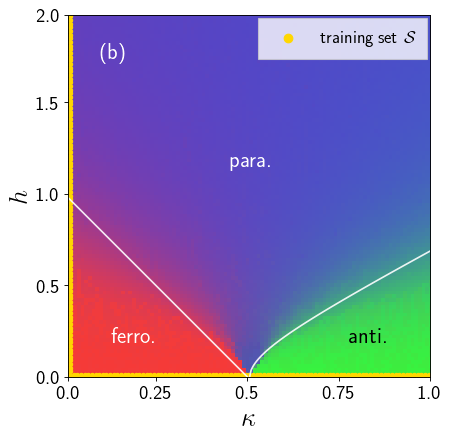

In [13]:
qcnns[0].train(lr, epoch, train_index_line, losses.cross_entropy)
show_QCNN_classificationANNNI(qcnns[0], hard_thr = False, train_index = lines, label = 'b', info=True)
plt.savefig('N'+str(qcnns[0].N)+'classification.svg')


Cost: 0.08923637121915817: 100%|██████████| 2000/2000 [03:59<00:00,  8.35it/s]


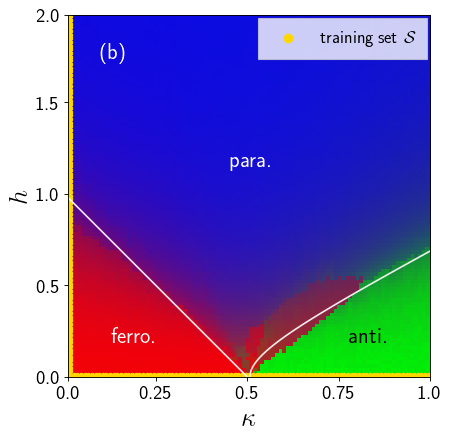

In [15]:
qcnns[1].train(lr, epoch, train_index_line, losses.cross_entropy)
qplt.show_QCNN_classificationANNNI(qcnns[1], hard_thr = False, train_index = lines, label = 'b', info=True)
plt.savefig('N'+str(qcnns[1].N)+'classification.svg')


Cost: 0.06732767820358276: 100%|██████████| 5000/5000 [11:46<00:00,  7.08it/s]


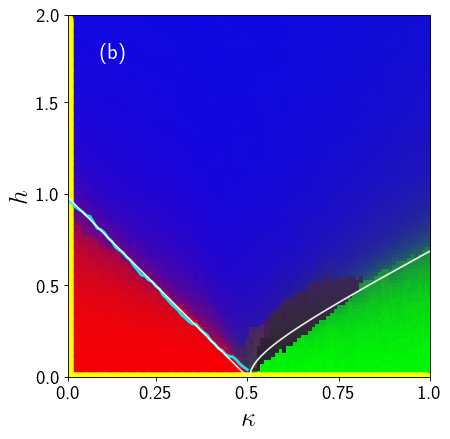

In [9]:
myqcnn = qcnn.qcnn(vqes[-1], qcnn.qcnn_circuit, n_outputs = 2)
myqcnn.train(lr, epoch, train_index_line, losses.cross_entropy)
qplt.show_QCNN_classificationANNNI(myqcnn, hard_thr = False, deltaeline = cents, train_index = lines, label = 'b')
plt.savefig('N12classification.svg')

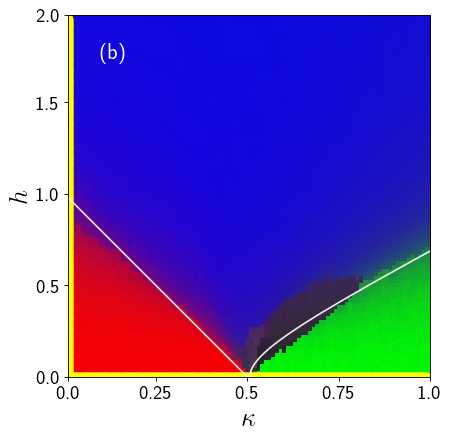

In [13]:
show_QCNN_classificationANNNI(myqcnn, hard_thr = False, train_index = lines, label = 'b')
plt.savefig('N12classification.svg')